Dataset shape: (506, 14)

Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

First 5 rows:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

Missing values BEFORE handling:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT     

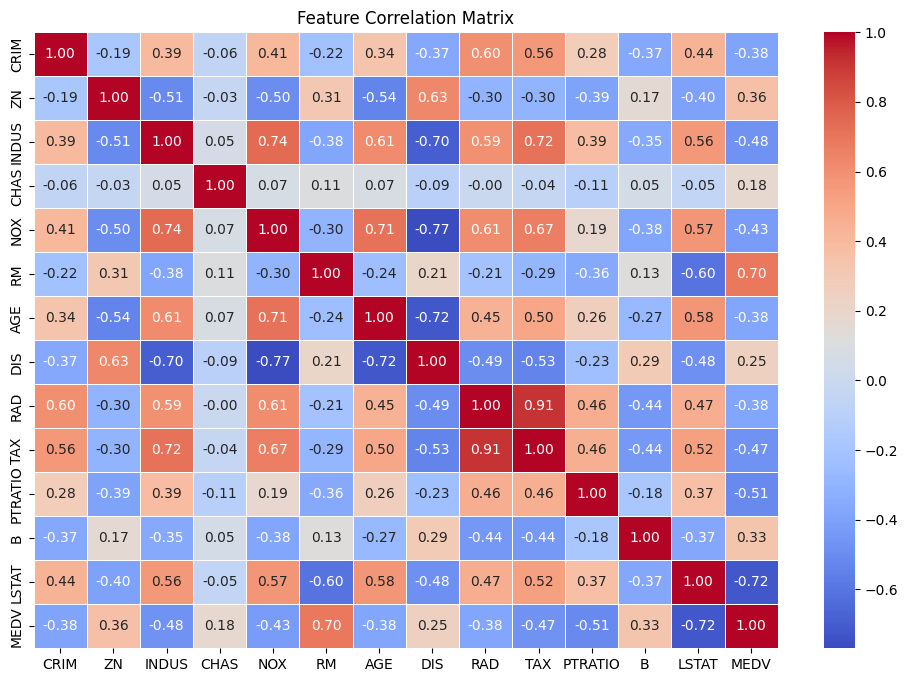

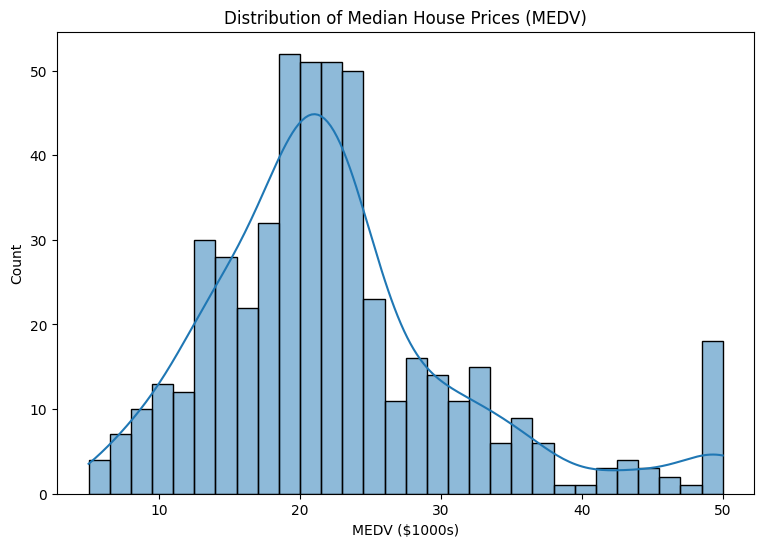


Model Performance (5-fold CV + test)

Linear Regression
  CV R² mean:     0.7030 ± 0.0759
  Test RMSE:      4.9999
  Test R²:        0.6591

Random Forest
  CV R² mean:     0.7939 ± 0.0569
  Test RMSE:      2.8670
  Test R²:        0.8879

XGBoost
  CV R² mean:     0.8143 ± 0.0584
  Test RMSE:      2.6125
  Test R²:        0.9069


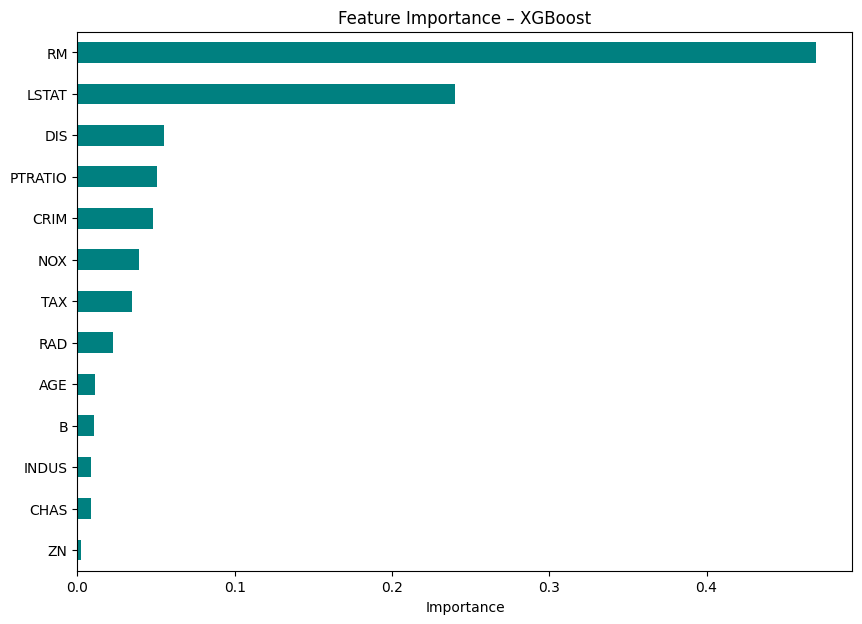


--------------------------------------------------
Example Prediction (XGBoost)
--------------------------------------------------
Predicted price : $24,835
Actual price    : $23,600
Difference      : $1,235


In [ ]:
# Boston Housing Price Prediction
# Goal: Predict median house prices using regression


# 1. Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')


# 2. Load and inspect data

df = pd.read_csv('boston.csv')

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values BEFORE handling:\n", df.isnull().sum())


# Handle missing values – THIS FIXES YOUR ERROR

# Fill missing numeric values with column median (safe & common for this dataset)
df = df.fillna(df.median(numeric_only=True))

print("\nMissing values AFTER handling:\n", df.isnull().sum())

# Safety check
if df.isnull().sum().sum() > 0:
    print("WARNING: Still some missing values! Consider df.dropna() instead.")
else:
    print("All missing values handled successfully.")


# 3. EDA visuals

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

plt.figure(figsize=(9, 6))
sns.histplot(df['MEDV'], kde=True, bins=30)
plt.title('Distribution of Median House Prices (MEDV)')
plt.xlabel('MEDV ($1000s)')
plt.show()


# 4. Prepare data

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled   = scaler.transform(X_test)


# 5. Models with cross-validation

cv = KFold(n_splits=5, shuffle=True, random_state=42)

print("\n" + "="*50)
print("Model Performance (5-fold CV + test)")
print("="*50)

# Linear Regression
lr = LinearRegression()
lr_cv_r2 = cross_val_score(lr, X_train_scaled, y_train, cv=cv, scoring='r2')
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\nLinear Regression")
print(f"  CV R² mean:     {lr_cv_r2.mean():.4f} ± {lr_cv_r2.std():.4f}")
print(f"  Test RMSE:      {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")
print(f"  Test R²:        {r2_score(y_test, y_pred_lr):.4f}")

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cv_r2 = cross_val_score(rf, X_train, y_train, cv=cv, scoring='r2')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest")
print(f"  CV R² mean:     {rf_cv_r2.mean():.4f} ± {rf_cv_r2.std():.4f}")
print(f"  Test RMSE:      {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}")
print(f"  Test R²:        {r2_score(y_test, y_pred_rf):.4f}")

# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_cv_r2 = cross_val_score(xgb, X_train_scaled, y_train, cv=cv, scoring='r2')
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print("\nXGBoost")
print(f"  CV R² mean:     {xgb_cv_r2.mean():.4f} ± {xgb_cv_r2.std():.4f}")
print(f"  Test RMSE:      {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.4f}")
print(f"  Test R²:        {r2_score(y_test, y_pred_xgb):.4f}")


# 6. Feature importance (XGBoost)

plt.figure(figsize=(10, 7))
importances = pd.Series(xgb.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title('Feature Importance – XGBoost')
plt.xlabel('Importance')
plt.show()


# 7. Example prediction

sample = X_test.iloc[[0]]
sample_scaled = scaler.transform(sample)

pred_price = xgb.predict(sample_scaled)[0]
actual_price = y_test.iloc[0]

print("\n" + "-"*50)
print("Example Prediction (XGBoost)")
print("-"*50)
print(f"Predicted price : ${pred_price * 1000:,.0f}")
print(f"Actual price    : ${actual_price * 1000:,.0f}")
print(f"Difference      : ${abs(pred_price - actual_price) * 1000:,.0f}")